<a href="https://colab.research.google.com/github/Manthanm9/Phishing-Email-Classification-with-Comparison-Based-Deep-Learning/blob/main/Transformers_distilbert_base_uncased.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.turing.com/kb/brief-introduction-to-transformers-and-their-power

https://www.youtube.com/watch?v=TmT-sKxovb0&t=467s

In [ ]:
# !pip install transformers
!pip install datasets transformers==4.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.9 MB/s eta 0:00:00


## Read the dataset csv file

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
#df = pd.read_csv('./input/dataset.csv')
df = pd.read_csv("/content/gdrive/My Drive/PhD/PhD Works/Transformar/dataset.csv")
df.head()

,Text,Class
0,Supply Quality China's EXCLUSIVE dimensions at...,1
1,over. SidLet me know. Thx.,0
2,"Dear Friend,Greetings to you.I wish to accost ...",1
3,MR. CHEUNG PUIHANG SENG BANK LTD.DES VOEUX RD....,1
4,Not a surprising assessment from Embassy.,0


## Process the data

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

In [ ]:
def process_data(row):

    text = row['Text']
    text = str(text)
    text = ' '.join(text.split())

    encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    label = 0
    if row['Class'] == 1:
        label += 1

    encodings['label'] = label
    encodings['text'] = text

    return encodings

In [ ]:
print(process_data({
    'Text': 'this is a sample review of a movie.',
    'Class': 1
}))

{'input_ids': [101, 2023, 2003, 1037, 7099, 3319, 1997, 1037, 3185, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'label': 1, 'text': 'this is a sample review of a movie.'}


In [ ]:
def process_data1(row):

    text = row['review']
    text = str(text)
    text = ' '.join(text.split())

    #encodings = tokenizer(text, padding="max_length", truncation=True, max_length=128)
    model = SentenceTransformer('sentence-transformers/LaBSE')
    encodings = model.encode(text)
    print(encodings)


    label = 0
    if row['sentiment'] == 'positive':
        label += 1

    encodings['label'] = label
    encodings['text'] = text

    return encodings

In [ ]:
print(process_data1({
    'review': 'this is a sample review of a movie.',
    'sentiment': '1'
}))

NameError: ignored

In [ ]:
processed_data = []

for i in range(len(df[:5])):
    print(process_data(df.iloc[i]))

{'input_ids': [101, 4425, 3737, 2859, 1005, 1055, 7262, 9646, 2012, 4895, 19442, 3085, 3976, 1012, 6203, 2909, 1010, 2057, 2024, 7537, 2000, 12367, 2017, 2004, 2028, 1997, 2859, 1005, 1055, 2922, 9167, 1004, 12324, 2358, 2080, 1027, 11265, 2194, 1011, 14071, 9863, 5643, 2177, 1010, 1996, 2177, 2049, 20178, 2569, 4697, 1999, 1996, 1053, 1027, 25423, 12244, 2075, 1010, 6364, 1998, 4341, 1997, 9812, 2962, 1010, 17584, 1998, 13262, 1998, 27211, 2078, 1027, 9033, 2239, 2962, 3688, 2005, 1996, 2311, 4475, 4753, 1998, 12233, 6089, 1027, 1027, 1016, 2063, 1996, 2177, 3136, 2024, 2241, 1999, 8418, 27245, 1010, 2148, 1997, 2859, 1010, 2029, 2003, 1996, 2474, 2099, 1027, 16216, 3367, 9167, 1998, 12324, 2449, 27388, 1999, 2859, 2073, 14071, 9863, 5643, 8617, 1998, 1027, 5748, 2536, 3019, 2962, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
processed_data = []

for i in range(len(df[:8000])):
    processed_data.append(process_data(df.iloc[i]))

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
print(X)
list(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
[[4 5]
 [0 1]
 [6 7]]
[2, 0, 3]
[[2 3]
 [8 9]]
[1, 4]


## Generate the dataset

In [ ]:
from sklearn.model_selection import train_test_split

new_df = pd.DataFrame(processed_data)
#print(new_df)
train_df, valid_df = train_test_split(new_df, test_size=0.2, random_state=2022)
print(len(train_df))
print(len(train_df['label']))
print(len(valid_df))
print(len(valid_df['label']))

6400
6400
1600
1600


In [ ]:
 !pip install pyarrow

In [ ]:
#!pip install datasets transformers==4.28.0

In [ ]:
!pip install datasets

In [ ]:
import pyarrow as pa
from datasets import Dataset

train_hg = Dataset(pa.Table.from_pandas(train_df))
print(train_hg)
valid_hg = Dataset(pa.Table.from_pandas(valid_df))
print(valid_hg)

Dataset({
    features: ['attention_mask', 'input_ids', 'label', 'text', '__index_level_0__'],
    num_rows: 6400
})
Dataset({
    features: ['attention_mask', 'input_ids', 'label', 'text', '__index_level_0__'],
    num_rows: 1600
})


## Create a model

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased',num_labels=2)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_projector.bias', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classi

In [ ]:
Models = {
    "BERT base uncased": "bert-base-uncased",
    "BERT base cased": "bert-base-cased",
    "BERT large uncased": "bert-large-uncased",
    "BERT large cased": "bert-large-cased",
    "XLNet": "xlnet-base-cased",
    "RoBERTa": "roberta-base",
    "DistilBERT": "distilbert-base-uncased"
}

In [ ]:
#!pip install transformers[torch]

In [ ]:
#!pip install datasets transformers==4.28.0

In [ ]:
#!pip install accelerate

In [ ]:
from transformers import TrainingArguments, Trainer


#training_args = TrainingArguments(output_dir="./result", evaluation_strategy="epoch")
training_args = TrainingArguments(output_dir="./result", num_train_epochs=5)
trainer = Trainer(model=model, args=training_args, train_dataset=train_hg, eval_dataset=valid_hg, tokenizer=tokenizer)

## Train and Evaluate the model

In [ ]:
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
You're using a DistilBertTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
500,0.080000
1000,0.019600
1500,0.007100
2000,0.006600
2500,0.002300
3000,0.000000
3500,0.000000
4000,0.000000


TrainOutput(global_step=4000, training_loss=0.014469802783685736, metrics={'train_runtime': 434.3092, 'train_samples_per_second': 73.68, 'train_steps_per_second': 9.21, 'total_flos': 1059739189248000.0, 'train_loss': 0.014469802783685736, 'epoch': 5.0})

In [ ]:
x=trainer.evaluate()  #train_hg,train_hg['label'])
x

{'eval_loss': 0.03304897993803024,
 'eval_runtime': 2.6018,
 'eval_samples_per_second': 76.869,
 'eval_steps_per_second': 9.609,
 'epoch': 3.0}

In [ ]:
#train_metrics = trainer.evaluate(train_hg, train_hg['label'])
#test_metrics = trainer.evaluate(valid_hg, valid_hg['label'])
#print('Training set evaluation - Accuracy:\n', train_metrics[1], ' Precision: ', train_metrics[2], ' Recall: ', train_metrics[3])
#print('Test set evaluation - Accuracy:\n', test_metrics[1], ' Precision: ', test_metrics[2], ' Recall: ', test_metrics[3], '\n')

## Save the model

In [ ]:
model.save_pretrained('./model/')

## Load the model

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

new_model = AutoModelForSequenceClassification.from_pretrained('./model/').to(device)

In [ ]:
from transformers import AutoTokenizer

new_tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

## Get predictions

In [ ]:
import torch
import numpy as np

def get_prediction(text):
    encoding = new_tokenizer(text, return_tensors="pt", padding="max_length", truncation=True, max_length=128)
    encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

    outputs = new_model(**encoding)

    logits = outputs.logits
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    sigmoid = torch.nn.Sigmoid()
    #print(sigmoid)
    probs = sigmoid(logits.squeeze().cpu())
    probs = probs.detach().numpy()
    label = np.argmax(probs, axis=-1)

    if label == 1:
        return {
            'Class': 1,
            'Probability': probs[1]
        }
    else:
        return {
            'Class': 0,
            'probability': probs[0]
        }

In [ ]:
get_prediction("Supply Quality China's EXCLUSIVE dimensions at Unbeatable Price.Dear Sir, We are pleased to inform you as one of China's largest export & import sto=ne company-Wanlistone Group, The Group its subsidiaries specialize in the q=uarrying, processing and Sales of dimension stone, slab and tiles and dimen=sion stone products for the building materials sector and specialty markets==2E The Group operations are based in Xiamen, South of China, which is the lar=gest export and import business portals in China where Wanlistone owns and =operates various natural stone deposits with 6,000 square meters through th=e country. In addition to the quarries Wanlistone has a fully automated pro=cessing plant for the processing of the granite and marble and granite prod=ucts. Wanlistone supplies granite in raw block form, granite and marble tile and= strips of varying dimension, memorial materials and specialty products to =both the local but more specifically the export markets. The Group has a full rang of the China natural stone products including Pink color G636, G617, G635, G663, Yellow color, G682,Dark G654, Black G68=")

{'Class': 1, 'Probability': 0.99433243}

In [ ]:
get_prediction("over. SidLet me know. Thx.")

{'Class': 0, 'probability': 0.9968997}

In [ ]:
lebel=[df[8000:].Class]
txt=[df[8000:].Text]
#print(txt)
#lebel
for i in txt:
  xx=i.tolist()
for j in lebel:
  y_true=j.tolist()

print(y_true)
'''
for id,i in enumerate(xx):
  print(yy[id])
  print(i)
  print("==>")
  out=get_prediction(i)
  print(out)
'''

y_pred=[]

for i in xx:
  #print(i)
  out=get_prediction(i)
  #print(out['Class'])
  y_pred.append(out['Class'])
print(y_pred)

[1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 

In [ ]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

confusion_matrix(y_true, y_pred)

array([[2230,    7],
       [   3, 1689]])

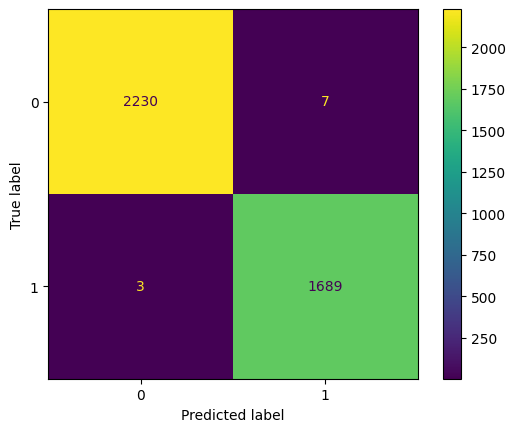

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
accuracy_score(y_true, y_pred)


0.9974548231102062

In [ ]:
from sklearn.metrics import precision_score

precision_score(y_true, y_pred, average='macro')
#precision_score(y_true, y_pred, average='micro')
#precision_score(y_true, y_pred, average='weighted')
#precision_score(y_true, y_pred, average=None)


0.9972645787036646

In [ ]:
from sklearn.metrics import recall_score

recall_score(y_true, y_pred, average='macro')
#recall_score(y_true, y_pred, average='micro')
#recall_score(y_true, y_pred, average='weighted')
#recall_score(y_true, y_pred, average=None)


0.9975488797369831

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_true, y_pred, average='macro')
#f1_score(y_true, y_pred, average='micro')
#f1_score(y_true, y_pred, average='weighted')
#f1_score(y_true, y_pred, average=None)

0.9974056348369955

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2237
           1       1.00      1.00      1.00      1692

    accuracy                           1.00      3929
   macro avg       1.00      1.00      1.00      3929
weighted avg       1.00      1.00      1.00      3929



In [ ]:
from transformers import pipeline
from sklearn.metrics import classification_report


text_classification_pipeline = pipeline("text-classification", model="model")

X = [ "This is a cat sentence", "This is a dog sentence", "This is a fish sentence"]
y_act = ["LABEL_1", "LABEL_2", "LABEL_3"]
labels = ["LABEL_1", "LABEL_2", "LABEL_3"]

y_pred = [result["label"] for result in text_classification_pipeline(X)]

print(classification_report(y_pred, y_act, labels=labels))

OSError: ignored

# ===========================

### Advice from BK Sir

In [ ]:
!pip install -U sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 931.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 21.7 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125925 sha256=6929fa70b156402fe1647a087715f290c2f1b8fa5a890be5282920e97585373b
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/LaBSE')
embeddings = model.encode(sentences)
print(embeddings)

[[ 0.02882476 -0.0060238  -0.05947006 ... -0.03002251 -0.02960703
   0.00067478]
 [-0.05550232  0.02546488 -0.02157256 ...  0.02932104  0.01150039
  -0.00848788]]


# ======================================================

## The Import Section

In [ ]:
# Different layers
from tensorflow.keras.layers import MultiHeadAttention, Input, Dense
from tensorflow.keras.layers import LayerNormalization, Layer
from tensorflow.keras.layers import TextVectorization, Embedding, GlobalAveragePooling1D
# For miscellaneous functions
from tensorflow.data import Dataset
from tensorflow import convert_to_tensor, string, float32, shape, range, reshape
from tensorflow.keras import utils
# Keras models
from tensorflow.keras import Model, Sequential
# For datasets
from sklearn.datasets import fetch_20newsgroups
# For evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# For math/arrays
import numpy as np
# For plotting
import matplotlib.pyplot as plt

## Load the Dataset

In [ ]:
# Load the training dataset while removing headers, footers and quotes
train_dataset = fetch_20newsgroups(subset='train', random_state=0, remove=("headers", "footers", "quotes"))
train_X, train_Y = (train_dataset.data, train_dataset.target)

# Test dataset
test_dataset = fetch_20newsgroups(subset='test', random_state=0,
remove=("headers", "footers", "quotes"))
test_X, test_Y = (test_dataset.data, test_dataset.target)
# Target classes
newsgroup_names = train_dataset.target_names
# Total classes
n_classes = len(train_dataset.target_names)
# Convert to binary vectors to represent categories
train_Y_categorical = utils.to_categorical(train_Y)
test_Y_categorical = utils.to_categorical(test_Y)

#Print statistics
print("Total training sequences: ", len(train_X))
print("Total test sequences: ", len(test_X))
print("Target categories are: ", newsgroup_names)
#Total training sequences: 11314
#Total test sequences: 7532
#Target categories are: ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

Total training sequences:  11314
Total test sequences:  7532
Target categories are:  ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
example_index = 10
print('Category: ', newsgroup_names[train_Y[example_index]])
print('Corresponding text: ', train_X[example_index])

Category:  sci.med
Corresponding text:  




There's been extensive discussion on the CompuServe Cancer Forum about Dr. 
Burzynski's treatment as a result of the decision of a forum member's father 
to undertake his treatment for brain glioblastoma.  This disease is 
universally and usually rapidly fatal.  After diagnosis in June 1992, the 
tumor was growing rapidly despite radiation and chemotherapy.  The forum 
member checked extensively on Dr. Burzynki's track record for this disease.  
He spoke to a few patients in complete remission for a few years from 
glioblastoma following this treatment and to an NCI oncologist who had 
audited other such case histories and found them valid and impressive.  
After the forum member's father began Dr. Burzynski's treatment in 
September, all subsequent scans performed under the auspices of his 
oncologist in Chicago have shown no tumor growth with possible signs of 
shrinkage or necrosis.

The patient's oncologist, although telling him he would

## Text Vectorization: Converting Words to Numbers

In [ ]:
toy_sentences = [["I am happy today"], ["today weather is awesome"]]
# Create the TextVectorization layer
toy_vectorize_layer = TextVectorization(
output_sequence_length=8,
max_tokens=15)
# Learn a dictionary
toy_vectorize_layer.adapt(Dataset.from_tensor_slices(toy_sentences))
# Use the trained TextVectorization to replace each word by its
# dictionary index
toy_vectorized_words = toy_vectorize_layer(convert_to_tensor(toy_sentences, dtype=string))
print("Dictionary: ", toy_vectorize_layer.get_vocabulary())
print("Vectorized words: ", toy_vectorized_words)
#Dictionary: ['', '[UNK]', 'today', 'weather', 'is', 'i', 'happy', 'awesome', 'am']
#Vectorized words: tf.Tensor([[5 8 6 2 0 0 0 0][2 3 4 7 0 0 0 0]], shape=(2, 8), dtype=int64)

Dictionary:  ['', '[UNK]', 'today', 'weather', 'is', 'i', 'happy', 'awesome', 'am']
Vectorized words:  tf.Tensor(
[[5 8 6 2 0 0 0 0]
 [2 3 4 7 0 0 0 0]], shape=(2, 8), dtype=int64)


## Vectorize the Training and Test Data

In [ ]:
# The total distinct words to use
vocab_size = 25000
# Specify the maximum charancters to consider in each newsgroup
sequence_length = 300

train_X_tensor = Dataset.from_tensor_slices(train_X)
# TextVectorization layer
vectorize_layer = TextVectorization(
output_sequence_length=sequence_length,
max_tokens=vocab_size)
# Adapt method trains the TextVectorization layer and
# creates a dictionary
vectorize_layer.adapt(train_X_tensor)
# Convert all newsgroups in train_X to vectorized tensors
train_X_tensors = convert_to_tensor(train_X, dtype=string)
train_X_vectorized = vectorize_layer(train_X_tensors)
# Convert all newsgroups in test_X to vectorized tensors
test_X_tensors = convert_to_tensor(test_X, dtype=string)
test_X_vectorized = vectorize_layer(test_X_tensors)

## The Embedding Layer: Positional Encoding of Words and Indices

In [ ]:
# Embedding for words
toy_word_embedding_layer = Embedding(input_dim=15, output_dim=4)
toy_embedded_words = toy_word_embedding_layer(toy_vectorized_words)
# Embedding for positions
toy_position_embedding_layer = Embedding(input_dim=8, output_dim=4)
toy_positions = range(start=0, limit=8, delta=1)
toy_embedded_positions = toy_position_embedding_layer(toy_positions)

## Writing a Customized Embedding Layer